In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [12]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as s

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

species_n = {0 : 'setosa', 1: 'versicular', 2: 'virginia'}
df['species_n'] = df['species'].map(species_n)

In [7]:
print('iris dataset')
print(f"Dataset shape: {df.shape}")
print("\nFirst rows: ")
print(df.head())

iris dataset
Dataset shape: (150, 6)

First rows: 
   sepal length (cm)  sepal width (cm)  ...  species  species_n
0                5.1               3.5  ...        0     setosa
1                4.9               3.0  ...        0     setosa
2                4.7               3.2  ...        0     setosa
3                4.6               3.1  ...        0     setosa
4                5.0               3.6  ...        0     setosa

[5 rows x 6 columns]


In [8]:
numeric_df = df.select_dtypes(include=[np.number]).drop('species', axis=1)
corr_m = numeric_df.corr()

In [9]:
print("\nCorr Matrix: ")
print(corr_m.round(2))


Corr Matrix: 
                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)               1.00  ...              0.82
sepal width (cm)               -0.12  ...             -0.37
petal length (cm)               0.87  ...              0.96
petal width (cm)                0.82  ...              1.00

[4 rows x 4 columns]


In [10]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_m, dtype=bool))

<Figure size 1000x800 with 0 Axes>

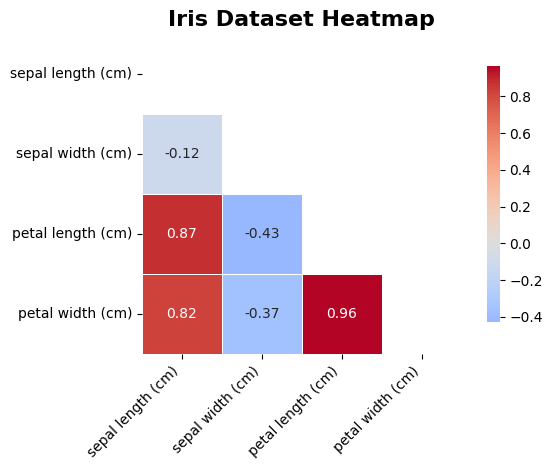

In [15]:
heatmap = s.heatmap(corr_m, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={"shrink":0.8}, linewidths=0.5)
plt.title('Iris Dataset Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation = 45, ha='right')
plt.yticks(rotation=0)
plt.savefig('heatmap.png')
plt.tight_layout()
plt.show()

In [19]:
print("Corr analysis: ")
strong_cor = []

for i in range(len(corr_m.columns)):
            for j in range(i+1, len(corr_m.columns)):
                    corr_v = corr_m.iloc[i,j]
                    if(abs(corr_v)>0.7): 
                            strong_cor.append((corr_m.columns[i], corr_m.columns[j], corr_v))

print("Strong correlation (|r| > 0.7): ")
for f1,f2, corr_v in strong_cor: 
        print(f"{f1}-{f2}: {corr_v:.3f}")



Corr analysis: 
Strong correlation (|r| > 0.7): 
sepal length (cm)-petal length (cm): 0.872
sepal length (cm)-petal width (cm): 0.818
petal length (cm)-petal width (cm): 0.963
